## Name: Aswathi Ajith
### Task -2

###  Experimentation and uplift testing

##### 

The goal is to analyze the effectiveness of a trial campaign by comparing trial stores with control stores. 

We aim to:

- Confirm that the control stores are similar enough to the trial stores before the trial period (pre-trial).
- Measure the difference in performance (e.g., sales uplift) between the trial and control stores during the trial period.
- Determine whether the trial had a statistically significant impact.

In [1]:
# Loading required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

# Import Dataset

In [2]:
df = pd.read_csv("Downloads\QVI_data.csv")
df.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget


In [3]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

## Data Exploration

Stores 77, 86 and 88 as selected as the trial stores with a trial period of Feb 2019 to April 2019. Once the stores have been selected as the control stores, compare each trial and control pair during the trial period.            
           
Main objectives are :-

- Select control stores – Explore data, define metrics, visualize graphs
- Assessment of the trial – insights/trends by comparing trial stores with control stores
- Collate findings – summarize and provide recommendations

We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of:

- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 19.2+ MB


#### We have to change the dtype of the DATE column 

In [5]:
# Change DATE column to store dates as datetimes 
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 20.2+ MB


#### Check for the null values in the dataset

In [7]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

---------------- No null (missing) values in the dataset

#### We need to see through: 

 - Overall sales revenue
 - No of customers
 - No of transactions per customer
 - Chips per customer
 - Average price per unit
 
For each store and month

#### To create a year and month column in the dataset

In [8]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [9]:
df['YEAR_MONTH'] = df['DATE'].dt.strftime('%Y%m').astype('int64')
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


In [10]:
# Check
df['YEAR_MONTH'][:5]

0    201810
1    201809
2    201903
3    201903
4    201811
Name: YEAR_MONTH, dtype: int64

#### Define columns for the metrics

In [11]:
# Store and year_month column
store_yr_month_group = df.groupby(['STORE_NBR','YEAR_MONTH'])

# Overall sales revenue
total_sales = store_yr_month_group['TOT_SALES'].sum()

# No of customers
n_cutomers = store_yr_month_group['LYLTY_CARD_NBR'].nunique()

# No of transactions per customer
# n_trans_per_customer = store_yr_month_group['TXN_ID'].nunique()/n_cutomers
n_trans_per_customer = store_yr_month_group['TXN_ID'].size()/n_cutomers
# Returns no of rows/transactions in for that store and month / n_cust

# No of chips per transaction
n_chips_per_trans = store_yr_month_group['PROD_QTY'].sum()/store_yr_month_group['TXN_ID'].nunique()

# Average price per unit 
avg_price_per_unit = total_sales/store_yr_month_group['PROD_QTY'].sum()

In [12]:
metrics_arrays =[total_sales,n_cutomers,n_trans_per_customer,n_chips_per_trans,avg_price_per_unit]
metrics_df = pd.concat(metrics_arrays, axis=1)
# Give the columns labels 
metrics_df.columns = ['Total_Sales','No_customers','No_Trans_per_Customer','No_Chips_per_Trans',
                      'Avg_Price_per_Unit']
metrics_df = metrics_df.reset_index()

In [13]:
metrics_df.head(3)

,STORE_NBR,YEAR_MONTH,Total_Sales,No_customers,No_Trans_per_Customer,No_Chips_per_Trans,Avg_Price_per_Unit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333


In [14]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STORE_NBR              3169 non-null   int64  
 1   YEAR_MONTH             3169 non-null   int64  
 2   Total_Sales            3169 non-null   float64
 3   No_customers           3169 non-null   int64  
 4   No_Trans_per_Customer  3169 non-null   float64
 5   No_Chips_per_Trans     3169 non-null   float64
 6   Avg_Price_per_Unit     3169 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 173.4 KB


#### Filter to select the stores with full observation periods

In [15]:
# Count occurrences of each store 
obs_counts = metrics_df.groupby('STORE_NBR').YEAR_MONTH.nunique().reset_index()
# When the count is 12, its full observation
stores_full_obv = obs_counts[obs_counts.YEAR_MONTH==12].STORE_NBR
# Contains a list of store numbers that have a complete observation period of 12 entries.
full_observ_df = metrics_df[metrics_df["STORE_NBR"].isin(stores_full_obv)]

In [16]:
full_observ_df

,STORE_NBR,YEAR_MONTH,Total_Sales,No_customers,No_Trans_per_Customer,No_Chips_per_Trans,Avg_Price_per_Unit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.037037,1.909091,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


#### Pre-trial periods full observation

In [17]:
pretrial_full_observ = full_observ_df.loc[full_observ_df['YEAR_MONTH']< 201902]


In [18]:
pretrial_full_observ

,STORE_NBR,YEAR_MONTH,Total_Sales,No_customers,No_Trans_per_Customer,No_Chips_per_Trans,Avg_Price_per_Unit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.159091,1.980000,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


In [19]:
pretrial_full_observ.columns

Index(['STORE_NBR', 'YEAR_MONTH', 'Total_Sales', 'No_customers',
       'No_Trans_per_Customer', 'No_Chips_per_Trans', 'Avg_Price_per_Unit'],
      dtype='object')


#### Now to calculate correlated performance of each store is to the trial store. We create a function to calculate correlation for a measure, looping through each control store


In [20]:
def calc_corr(trial, metricCol, inputTable=pretrial_full_observ):
    trial_stores = [77, 86, 88]
    # Control stores are all stores but not the trial stores from full obs
    control_stores = stores_full_obv[~stores_full_obv.isin(trial_stores)]
    
    # To get the trial store values
    trial_values = inputTable[inputTable['STORE_NBR'] == trial][metricCol].reset_index()
    corr_table = pd.DataFrame(columns=['YEAR_MONTH', 'trial_store', 'control_store', 'correlation'])
    
    # To get the control store values
    for control in control_stores:
        control_val = inputTable[inputTable['STORE_NBR'] == control][metricCol].reset_index()
        corr_control_table = pd.DataFrame(columns=['YEAR_MONTH', 'trial_store', 'control_store', 'correlation'])
        corr_control_table['YEAR_MONTH'] = list(inputTable.loc[inputTable.STORE_NBR == control]["YEAR_MONTH"])
        corr_control_table['trial_store'] = trial  # Corrected here
        corr_control_table['control_store'] = control
        corr_control_table['correlation'] = control_val.corrwith(trial_values, axis=1)
        corr_table = pd.concat([corr_table, corr_control_table])
    return corr_table


In [21]:
# Iterate over trial stores and compute correlations
trial_stores = [77, 86, 88]
corr_table = pd.DataFrame(columns=['YEAR_MONTH', 'trial_store', 'control_store', 'correlation'])

for trial in trial_stores:
    corr_fn = calc_corr(
        trial, 
        ['Total_Sales', 'No_customers', 'No_Trans_per_Customer', 'No_Chips_per_Trans', 'Avg_Price_per_Unit']
    )
    corr_table = pd.concat([corr_table, corr_fn])
corr_table

,YEAR_MONTH,trial_store,control_store,correlation
0,201807,77,1,0.070544
1,201808,77,1,0.027332
2,201809,77,1,0.002472
3,201810,77,1,-0.019991
4,201811,77,1,0.030094
...,...,...,...,...
2,201809,88,272,0.533159
3,201810,88,272,0.591052
4,201811,88,272,0.566378
5,201812,88,272,0.594441


#### Apart from correlation, we can also calculate a standardised metric based on the absolute difference between the trial store’s performance and each control store’s performance. 

In [22]:
def calc_distance(trial, metricCol, inputTable=pretrial_full_observ):
    trial_store = [77, 86, 88]
    control_stores = stores_full_obv[~stores_full_obv.isin(trial_store)]
    
    # Trial store data 
    trial_data = inputTable[inputTable['STORE_NBR'] == trial][['YEAR_MONTH'] + metricCol].reset_index()
    dist_table = []
    
    # To get the control values
    for control in control_stores:
        control_data = inputTable[inputTable['STORE_NBR'] == control][metricCol].reset_index()
        # Compute the absolute distances
        distance = abs(trial_data[metricCol] - control_data)
        distance['YEAR_MONTH'] = trial_data['YEAR_MONTH']
        distance['trial_store'] = trial  # Corrected here
        distance['control_store'] = control
        # Append
        dist_table.append(distance)
    # Combine all
    dist_table = pd.concat(dist_table, ignore_index=True)
    
    # Normalize the distance 
    for col in metricCol:
        maxdist = dist_table[col].max()
        mindist = dist_table[col].min()
        dist_table[col] = 1 - (dist_table[col] - mindist) / (maxdist - mindist)
    # Compute average magnitude measure
    dist_table["mag_measure"] = dist_table[metricCol].mean(axis=1)
    return dist_table


In [23]:
# Iterate over trial stores and compute correlations
trial_stores = [77, 86, 88]

for trial in trial_stores:
    dist_table = calc_distance(trial,['Total_Sales', 'No_customers', 'No_Trans_per_Customer', 'No_Chips_per_Trans', 'Avg_Price_per_Unit'])
dist_table

,Avg_Price_per_Unit,No_Chips_per_Trans,No_Trans_per_Customer,No_customers,Total_Sales,index,YEAR_MONTH,trial_store,control_store,mag_measure
0,0.607380,0.222408,0.573684,0.379845,0.218325,NaN,201807,88,1,0.400328
1,0.539175,0.362760,0.325115,0.310078,0.186721,NaN,201808,88,1,0.344769
2,0.684957,0.214602,0.209459,0.496124,0.189201,NaN,201809,88,1,0.358869
3,0.568810,0.278123,0.105528,0.387597,0.174957,NaN,201810,88,1,0.303003
4,0.573707,0.229761,0.364792,0.348837,0.156604,NaN,201811,88,1,0.334740
...,...,...,...,...,...,...,...,...,...,...
1794,0.923887,0.948729,0.462846,0.286822,0.207554,NaN,201809,88,272,0.565968
1795,0.971133,0.943478,0.571497,0.387597,0.346797,NaN,201810,88,272,0.644101
1796,0.966999,0.923475,0.623883,0.310078,0.286706,NaN,201811,88,272,0.622228
1797,0.962198,0.884572,0.376456,0.387597,0.347151,NaN,201812,88,272,0.591595


In [24]:
dist_table = dist_table.drop(['index'],axis=1)

In [25]:
dist_table

,Avg_Price_per_Unit,No_Chips_per_Trans,No_Trans_per_Customer,No_customers,Total_Sales,YEAR_MONTH,trial_store,control_store,mag_measure
0,0.607380,0.222408,0.573684,0.379845,0.218325,201807,88,1,0.400328
1,0.539175,0.362760,0.325115,0.310078,0.186721,201808,88,1,0.344769
2,0.684957,0.214602,0.209459,0.496124,0.189201,201809,88,1,0.358869
3,0.568810,0.278123,0.105528,0.387597,0.174957,201810,88,1,0.303003
4,0.573707,0.229761,0.364792,0.348837,0.156604,201811,88,1,0.334740
...,...,...,...,...,...,...,...,...,...
1794,0.923887,0.948729,0.462846,0.286822,0.207554,201809,88,272,0.565968
1795,0.971133,0.943478,0.571497,0.387597,0.346797,201810,88,272,0.644101
1796,0.966999,0.923475,0.623883,0.310078,0.286706,201811,88,272,0.622228
1797,0.962198,0.884572,0.376456,0.387597,0.347151,201812,88,272,0.591595


In [26]:
dist_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Avg_Price_per_Unit     1799 non-null   float64
 1   No_Chips_per_Trans     1799 non-null   float64
 2   No_Trans_per_Customer  1799 non-null   float64
 3   No_customers           1799 non-null   float64
 4   Total_Sales            1799 non-null   float64
 5   YEAR_MONTH             1799 non-null   int64  
 6   trial_store            1799 non-null   int64  
 7   control_store          1799 non-null   int64  
 8   mag_measure            1799 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 126.6 KB


In [27]:
dist_table.columns

Index(['Avg_Price_per_Unit', 'No_Chips_per_Trans', 'No_Trans_per_Customer',
       'No_customers', 'Total_Sales', 'YEAR_MONTH', 'trial_store',
       'control_store', 'mag_measure'],
      dtype='object')

In [28]:
corr_table.columns

Index(['YEAR_MONTH', 'trial_store', 'control_store', 'correlation'], dtype='object')

#### To select control stores based on how similar monthly total sales in and monthly number of customers are to the trial stores,

####  - Use the functions for calculating correlations
#### - Use the functions for calculating magnitude
#### - Create a combined score composed of correlation and magnitude

In [29]:
def calc_corr_distance_score(trial, metricCol, inputTable=pretrial_full_observ):
    # correlation: Measures how closely the trends in the control store's data align with the trial store.
    corr_values = calc_corr(trial, metricCol, inputTable=pretrial_full_observ)
    
    # Distance magnitude: Represents the normalized difference between the trial and control store's metric values.
    distance_values = calc_distance(trial, metricCol, inputTable=pretrial_full_observ)
    distance_values = distance_values.drop(metricCol, axis=1)
    
    # Combine correlation and distance values into one DataFrame
    merged_values_df = pd.merge(corr_values, distance_values, on=['YEAR_MONTH', 'trial_store', 'control_store'])
    
    # Using this combined DataFrame, calculate the avg correlation and distance values for the pre-trial period
    avg_merged_values = merged_values_df.groupby(['trial_store', 'control_store']).mean().reset_index()
    
    # To find weighted average of two metrics,
    # A weighting factor to decide how much importance to give to the correlation relative to the magnitude measure.
    weight = 0.5  # both metrics (correlation and magnitude) are equally important.
    avg_merged_values['combined_score'] = weight * avg_merged_values['correlation'] + (1 - weight) * avg_merged_values['mag_measure']
    
    # avg_merged_values: a table with the correlations, distance, and scores averaged over the pretrial months for each store
    return avg_merged_values


#### Function to output the 5 stores with the highest averaged scores combining the total sales and n customers for a given trial store over the pre-trial period 


In [30]:
def find_highestscore(trial):
    # Obtain the scores for total_sales and n_cutsomers 
    scores_totalsales = calc_corr_distance_score(trial,['Total_Sales'])
    scores_ncutomers = calc_corr_distance_score(trial,['No_customers'])
    # A table to stroe values
    scores_df = pd.DataFrame()
    scores_df['control_store'] = scores_totalsales.control_store
    # Calculate the composite scores 
    scores_df['correlation'] = 0.5*scores_totalsales.correlation + 0.5*scores_ncutomers.correlation
    scores_df['mag_measure'] = 0.5*scores_totalsales.mag_measure + 0.5*scores_ncutomers.mag_measure
    scores_df['scores'] = 0.5*scores_totalsales.combined_score + 0.5*scores_ncutomers.combined_score
    
    return(scores_df.sort_values(by = 'scores', ascending = False).reset_index(drop = True).head(5))
    
    

#### To find the control stores with the highest scores for each of the trial stores

In [31]:
trial_stores = [77, 86, 88]
for trial in trial_stores:
    print('Trial store: ', trial)
    print(find_highestscore(trial))
    print()

Trial store:  77
   control_store  correlation  mag_measure    scores
0            233          1.0     0.989804  0.994902
1             41          1.0     0.972041  0.986020
2             46          1.0     0.969523  0.984762
3             53          1.0     0.968421  0.984211
4            111          1.0     0.967981  0.983991

Trial store:  86
   control_store  correlation  mag_measure    scores
0            155          1.0     0.976324  0.988162
1            109          1.0     0.968180  0.984090
2            225          1.0     0.965044  0.982522
3            229          1.0     0.957995  0.978997
4            101          1.0     0.945394  0.972697

Trial store:  88
   control_store  correlation  mag_measure    scores
0             40          1.0     0.941789  0.970895
1             26          1.0     0.917859  0.958929
2             72          1.0     0.908157  0.954079
3             58          1.0     0.900435  0.950217
4             81          1.0     0.887572  0.

From the above output, the control stores with the highest scores for each of the trial stores are:

- Store 233 for trial store 77
- Store 155 for trial store 86
- Store 40 for trial stre 88

#### To get the metrics before trial

In [32]:
pretrial_full_observ.head(3)

,STORE_NBR,YEAR_MONTH,Total_Sales,No_customers,No_Trans_per_Customer,No_Chips_per_Trans,Avg_Price_per_Unit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333


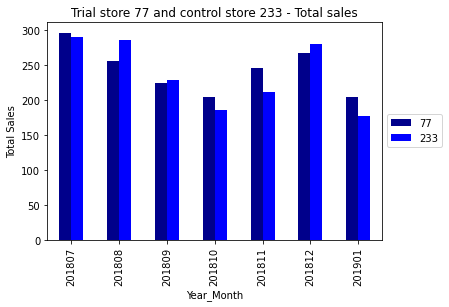

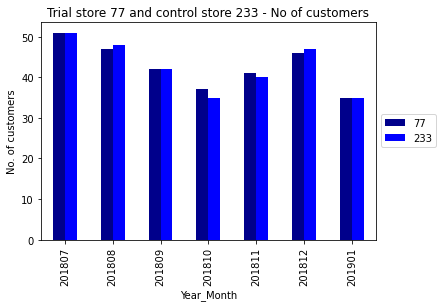

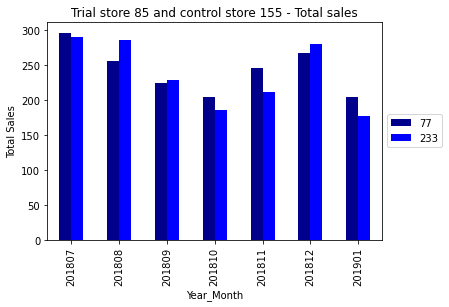

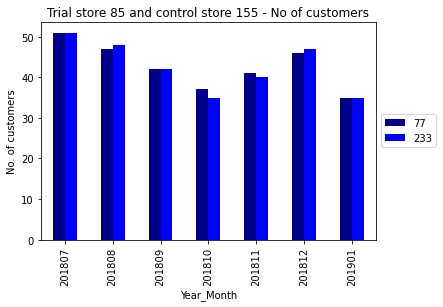

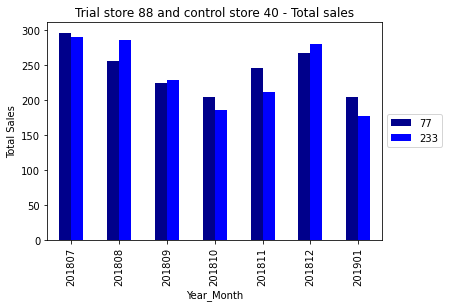

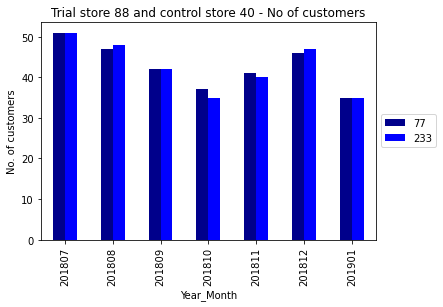

In [54]:
# To plot the graphs comparing the total sales and no of customers between the trail and control stores - during pre trial
combo_dict = {77:233,85:155,88:40}

for key,value in combo_dict.items():
    # For total sales
    pretrial_full_observ[pretrial_full_observ['STORE_NBR'].isin([77,233])].groupby(['YEAR_MONTH','STORE_NBR']).sum()['Total_Sales'].unstack().plot.bar(color=['darkblue', 'blue'])
    # This keeps only the rows where STORE_NBR is equal to either key (trial store) and val (control store).
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.xlabel("Year_Month", color="black")
    plt.ylabel("Total Sales")
    plt.title('Trial store'+ ' ' + str(key) +' '+ 'and control store' + ' ' + str(value)+' '+ '- Total sales')
    plt.show()
    
    # For n customers
    pretrial_full_observ[pretrial_full_observ['STORE_NBR'].isin([77,233])].groupby(['YEAR_MONTH','STORE_NBR']).sum()['No_customers'].unstack().plot.bar(color=['darkblue', 'blue'])
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title('Trial store'+ ' ' + str(key) +' '+ 'and control store' + ' ' + str(value)+' '+ '- No of customers')
    plt.xlabel("Year_Month", color="black")
    plt.ylabel("No. of customers")
    plt.show()
    print('\n')

#### Now, to compare the performance of Trial stores to Control stores during the trial period.

#### Control stores may have different sales volumes than trial stores. To make them comparable, a scaling factor is applied based on pre-trial data, to scale the sales of control stores using the calculated scaling factors. 



For total sales

- Calculate scaling factors for each trial-control store pair based on their total pre-trial sales.
- Control store sales are scaled using a ratio of total pre-trial sales between the trial and control stores.
- Scaled Sales (Control) = Sales (Control)× (Total Sales (Control)/Total Sales (Trial))

In [34]:
# Scaling factor = (Total sales of trial store) ÷ (Total sales of control store)

# Ratio of Store 77 and its Control store 233.
tsales_ratio77 = pretrial_full_observ[pretrial_full_observ['STORE_NBR']== 77]['Total_Sales'].sum()/pretrial_full_observ[pretrial_full_observ['STORE_NBR']==233]['Total_Sales'].sum()
# Ratio of Store 86 and its Control store 155.
tsales_ratio86 = pretrial_full_observ[pretrial_full_observ['STORE_NBR']== 86]['Total_Sales'].sum()/pretrial_full_observ[pretrial_full_observ['STORE_NBR']==155]['Total_Sales'].sum()
# Ratio of Store 88 and its Control store 40.
tsales_ratio88 = pretrial_full_observ[pretrial_full_observ['STORE_NBR']==88]['Total_Sales'].sum()/pretrial_full_observ[pretrial_full_observ['STORE_NBR']==40]['Total_Sales'].sum()


#### We want sales performance between trial stores and their respective control stores during the trial period

Trial Store: 77
     STORE_NBR  YEAR_MONTH  Total_Sales
887         77      201902        235.0
888         77      201903        278.5
889         77      201904        263.5
Control Store: 233
      STORE_NBR  YEAR_MONTH  Total_Sales  scaled_values
2706        233      201902        244.0     249.762622
2707        233      201903        199.1     203.802205
2708        233      201904        158.6     162.345704


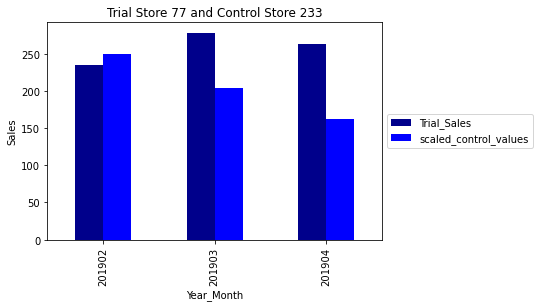

Trial Store: 86
     STORE_NBR  YEAR_MONTH  Total_Sales
984         86      201902        913.2
985         86      201903       1026.8
986         86      201904        848.2
Control Store: 155
      STORE_NBR  YEAR_MONTH  Total_Sales  scaled_values
1800        155      201902        891.2     864.522060
1801        155      201903        804.4     780.320405
1802        155      201904        844.6     819.317024


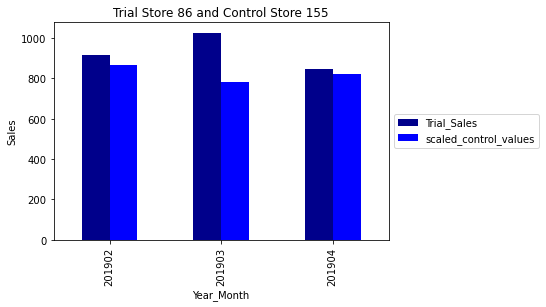

Trial Store: 88
      STORE_NBR  YEAR_MONTH  Total_Sales
1008         88      201902       1370.2
1009         88      201903       1477.2
1010         88      201904       1439.4
Control Store: 40
     STORE_NBR  YEAR_MONTH  Total_Sales  scaled_values
455         40      201902       1355.4    1434.399269
456         40      201903       1277.6    1352.064709
457         40      201904       1249.0    1321.797762


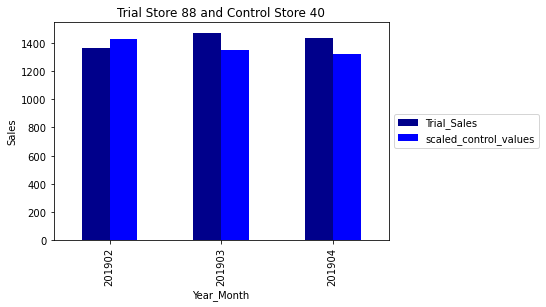

In [35]:
# Extract the control store data from the df and scale according to the trial store

trial_full_observ = full_observ_df[(full_observ_df['YEAR_MONTH']>= 201902) & (full_observ_df['YEAR_MONTH']<= 201904)] 
scaled_sales_control = full_observ_df[full_observ_df['STORE_NBR'].isin([233,155,40])][['STORE_NBR','YEAR_MONTH','Total_Sales']]

def scale(store):
    if store['STORE_NBR'] == 233:
        return store['Total_Sales']*tsales_ratio77
    elif store['STORE_NBR'] == 155:
        return store['Total_Sales']*tsales_ratio86
    elif store['STORE_NBR'] == 40:
        return store['Total_Sales']*tsales_ratio88
    return

scaled_sales_control['scaled_values'] = scaled_sales_control.apply(lambda store: scale(store), axis =1)
# During trial period - sales of control stores
trial_scaled_sales_control = scaled_sales_control[(scaled_sales_control['YEAR_MONTH']>=201902) & (scaled_sales_control['YEAR_MONTH']<=201904)]
# During pre trial- sales of control stores
pretrial_scaled_sales_control = scaled_sales_control[(scaled_sales_control['YEAR_MONTH']<201902)]

# To store the percentage difference in sales between the trial and scaled control stores for each trial store,
percentage_dict = {}

combo_dict = {77:233,86:155,88:40}

for trial,control in combo_dict.items():
    # To get scaled sales for the control store corresponding to the current trial store during the trial period.
    control_data = trial_scaled_sales_control[trial_scaled_sales_control['STORE_NBR'] == control]
    # To get sales for the current trial store during the trial period.
    trial_data = trial_full_observ[trial_full_observ['STORE_NBR'] == trial][["STORE_NBR", "YEAR_MONTH", "Total_Sales"]]
    # percentage diff = total sales of trial store / total scaled sales of control store
    percentage_dict[trial] = trial_data['Total_Sales'].sum() / control_data['scaled_values'].sum()
    
    print(f"Trial Store: {trial}")
    print(trial_data)
    print(f"Control Store: {control}")
    print(control_data)
    
    # merge the datas
    trial_data[["YEAR_MONTH", "Total_Sales"]].merge(control_data[["YEAR_MONTH", "scaled_values"]],on="YEAR_MONTH").set_index("YEAR_MONTH").rename(columns={"scaled_values":"scaled_control_values", "Total_Sales":"Trial_Sales"}).plot(kind='bar', figsize=(6, 4), color=["darkblue", "blue"])
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))
    plt.xlabel("Year_Month")
    plt.ylabel("Sales")
    plt.show()




In [36]:
percentage_dict

{77: 1.2615468650086281, 86: 1.1315014357363697, 88: 1.043458345854219}

#### The null hypothesis is that there is no difference in sales between pre-trial and trial periods for control stores. That is, trial stores and their control stores have no significant difference during the pre-trial period.

For this, 
- Pre-Trial vs. Trial Period for Control Stores: We need control store sales difference in trial and pre trial periods, T-test is applied to compare scaled sales of the control stores for these periods. 
- Pre-Trial Similarity Between Trial and Control Stores: T-test compares the actual sales of trial stores with the scaled sales of control stores.
- Trial vs. Pre-Trial Percentage Difference: 


#### To check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance. 

In [37]:
from scipy.stats import ttest_ind, t

In [38]:
trial_scaled_sales_control.columns

Index(['STORE_NBR', 'YEAR_MONTH', 'Total_Sales', 'scaled_values'], dtype='object')

In [39]:
# Step 1

alpha = 0.05
store_ids = [40, 155, 233]

for num in store_ids:
    pre_data = pretrial_scaled_sales_control[pretrial_scaled_sales_control["STORE_NBR"] == num]["scaled_values"]
    trial_data = trial_scaled_sales_control[trial_scaled_sales_control["STORE_NBR"] == num]["scaled_values"]
    
    # Perform t-test
    t_stat, p_value = ttest_ind(pre_data, trial_data, equal_var=False)
    
    print(f"Store {num}:")
    print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
    
    # Check significance
    if p_value < alpha:
        print(f"Result: Significant difference (p < {alpha})\n")
    else:
        print(f"Result: No significant difference (p >= {alpha})\n" )


Store 40:
t-statistic = -0.5958, p-value = 0.5723
Result: No significant difference (p >= 0.05)

Store 155:
t-statistic = 1.4292, p-value = 0.1973
Result: No significant difference (p >= 0.05)

Store 233:
t-statistic = 1.1911, p-value = 0.2945
Result: No significant difference (p >= 0.05)



#### Null hypothesis is true. There isn't any statistically significant difference between control store's scaled Pre-Trial and Trial period sales.

#### Proof control and trial stores are similar statistically during the pre-trial period.


In [41]:
# Step 2
for trial, cont in combo_dict.items():
    print("Trial store:", trial, ", Control store:", cont)
    # Extract pre-trial data and Perform t-test
    print(ttest_ind(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial]["Total_Sales"],
                   pretrial_scaled_sales_control[pretrial_scaled_sales_control["STORE_NBR"] == cont]["scaled_values"],
                   equal_var=True), '\n')
    
    t_stat, p_value = ttest_ind(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial]["Total_Sales"],
                   pretrial_scaled_sales_control[pretrial_scaled_sales_control["STORE_NBR"] == cont]["scaled_values"],
                   equal_var=True)
    # Check similarity
    if p_value >= alpha:
        print("Result: Statistically similar (p >= alpha)\n")
    else:
        print("Result: Statistically different (p < alpha)\n")
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=-1.2533353315065932e-15, pvalue=0.999999999999999) 

Result: Statistically similar (p >= alpha)

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=3.1048311203382156e-15, pvalue=0.9999999999999976) 

Result: Statistically similar (p >= alpha)

Trial store: 88 , Control store: 40
Ttest_indResult(statistic=-5.69358613974361e-15, pvalue=0.9999999999999956) 

Result: Statistically similar (p >= alpha)

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


#### Null hypothesis is true. There isn't any statistically significant difference between Trial store's sales and Control store's scaled-sales performance during pre-trial

#### To determine if the sales percentage difference between the trial store and its control store during the trial period is significantly different from the pre-trial average.

Pre-trial Analysis:
- Calculate the mean and standard deviation of the Sales_Percentage_Diff during the pre-trial period.

Trial Period Analysis:
- For each month in the trial period, Calculate the T-statistic for the percentage difference.

Output:

For each trial-control store pair,
- The T-statistic for each trial month. 
- The critical T-value for 95% confidence.



In [42]:
# Step 3 
# To merge the details of trial and control stores during pre,trial and post periods

data1 = scaled_sales_control.sort_values(by=["STORE_NBR", "YEAR_MONTH"], ascending=[False, True]).reset_index().drop(["Total_Sales", "index"], axis=1)
data2 = full_observ_df[full_observ_df["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEAR_MONTH", "Total_Sales"]].reset_index().drop(["index", "YEAR_MONTH"], axis=1)
full_data = pd.concat([data1,data2], axis=1)
def mark(x):
    if x < 201902:
        return "pre trial"
    elif x > 201904:
        return "post trial"
    else:
        return "trial"
full_data.columns = ['control_stores','YEAR_MONTH','control_scaled_values','trial_stores','t_total_sales']
full_data['period']   = full_data['YEAR_MONTH'].apply(lambda x: mark(x))  
full_data["Sales_Percentage_Diff"] = (full_data["t_total_sales"] - full_data["control_scaled_values"]) / (((full_data["t_total_sales"] + full_data["control_scaled_values"])/2))

for trial, control in combo_dict.items():
    print("Trial store:", trial, ", Control store:", control)
    count_pre = full_data[(full_data["control_stores"] == control) & (full_data["period"]=="pre trial")]
    std = count_pre["Sales_Percentage_Diff"].std()
    mean = count_pre["Sales_Percentage_Diff"].mean()
    #print(std, mean)
    for trial_month in full_data[full_data["period"] == "trial"]["YEAR_MONTH"].unique():
        pdif = full_data[(full_data["YEAR_MONTH"] == trial_month) & (full_data["trial_stores"] == trial)]["Sales_Percentage_Diff"]
        print(trial_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(count_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233
201902 : -0.7171038288055838
201903 : 3.035317928855674
201904 : 4.708944418758219


Trial store: 86 , Control store: 155
201902 : 1.4133618775921597
201903 : 7.123063846042147
201904 : 0.8863824572944234


Trial store: 88 , Control store: 40
201902 : -0.5481633746817577
201903 : 1.0089992743637823
201904 : 0.9710006270463672


Critical t-value for 95% confidence interval:
1.9431802803927816



#### The critical t-value for the 95% confidence interval is 1.943. A result exceeding this threshold indicates a statistically significant deviation in performance compared to the baseline.

#### We can observe that the t-value for the trial store 77 is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store 77 in March and April is statistically greater than in the control store. This can also be seen for March of trial store 86.


In [43]:

# pip install --upgrade matplotlib

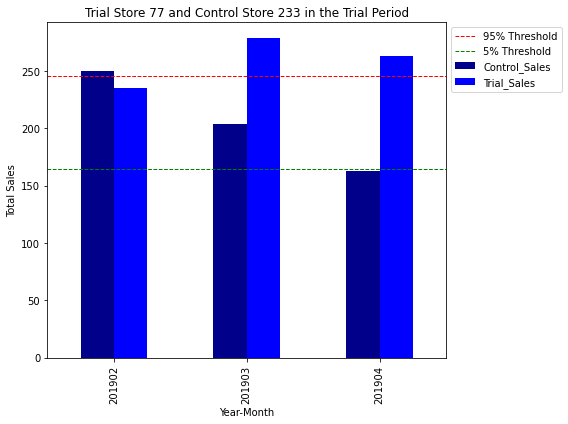

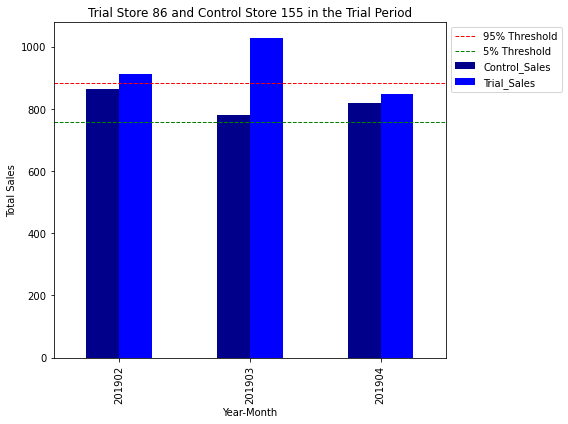

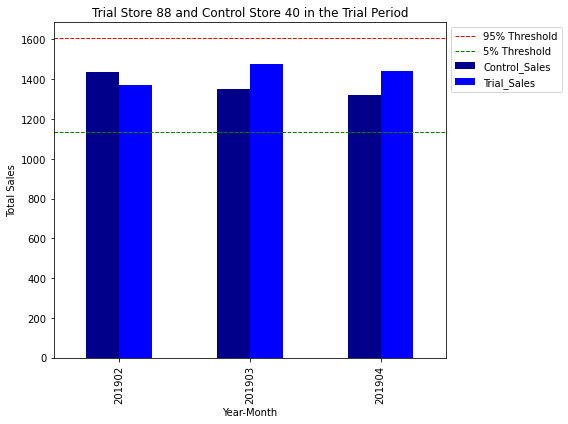

In [52]:
storepair = [[77, 233], [86, 155], [88, 40]]  # Stores are [trial, control]

for stores in storepair: 
    trial, control = stores[0], stores[1]

    # Filter and prepare data for trial and control stores
    plot_control = full_data[
        (full_data['control_stores'] == control) & 
        (full_data.YEAR_MONTH >= 201902) & 
        (full_data.YEAR_MONTH <= 201904)
    ][['YEAR_MONTH', 'control_scaled_values']].rename(columns={"control_scaled_values": "Control_Sales"})

    plot_trial = full_data[
        (full_data['trial_stores'] == trial) & 
        (full_data.YEAR_MONTH >= 201902) & 
        (full_data.YEAR_MONTH <= 201904)
    ][['YEAR_MONTH', 't_total_sales']].rename(columns={"t_total_sales": "Trial_Sales"})

    # Merge data for plotting
    toplot = plot_control.merge(plot_trial, on="YEAR_MONTH").set_index("YEAR_MONTH")

    # Plot the bar chart
    ax = toplot.plot(kind='bar', figsize=(8, 6), color=["darkblue", "blue"])
    
    # Calculate thresholds
    std = full_data[
        (full_data['control_stores'] == control) & 
        (full_data.YEAR_MONTH < 201902)
    ]['Sales_Percentage_Diff'].std()

    mean_control_sales = plot_control['Control_Sales'].mean()
    thresh95 = mean_control_sales * (1 + std * 2)
    thresh5 = mean_control_sales * (1 - std * 2)

    # Add threshold lines
    ax.axhline(y=thresh95, color='red', linestyle='--', linewidth=1, label="95% Threshold")
    ax.axhline(y=thresh5, color='green', linestyle='--', linewidth=1, label="5% Threshold")

    # Add plot details
    ax.set_title(f'Trial Store {trial} and Control Store {control} in the Trial Period')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Total Sales')
    ax.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))
    
    # Show plot
    plt.tight_layout()
    plt.show()


#### Now, to do the same set of measures with the no of customers of each of the store types.


Trial Store: 77
      STORE_NBR  YEAR_MONTH  No_customers  scaled_ncust_values
2706        233      201902            45            45.151007
2707        233      201903            40            40.134228
2708        233      201904            30            30.100671
Control Store: 233
     STORE_NBR  YEAR_MONTH  No_customers
887         77      201902            45
888         77      201903            50
889         77      201904            47


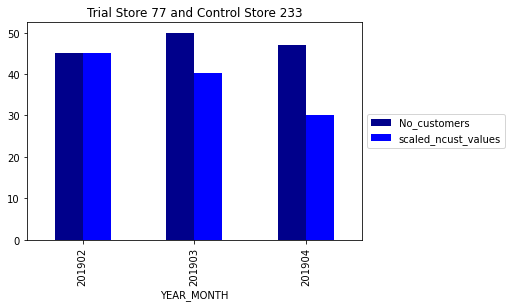

Trial Store: 86
      STORE_NBR  YEAR_MONTH  No_customers  scaled_ncust_values
1800        155      201902            95                 95.0
1801        155      201903            94                 94.0
1802        155      201904            99                 99.0
Control Store: 155
     STORE_NBR  YEAR_MONTH  No_customers
984         86      201902           107
985         86      201903           115
986         86      201904           105


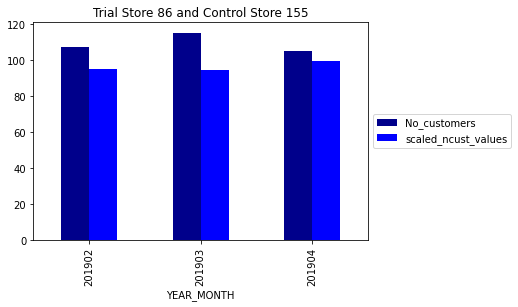

Trial Store: 88
     STORE_NBR  YEAR_MONTH  No_customers  scaled_ncust_values
455         40      201902           125           127.610209
456         40      201903           118           120.464037
457         40      201904           119           121.484919
Control Store: 40
      STORE_NBR  YEAR_MONTH  No_customers
1008         88      201902           124
1009         88      201903           134
1010         88      201904           128


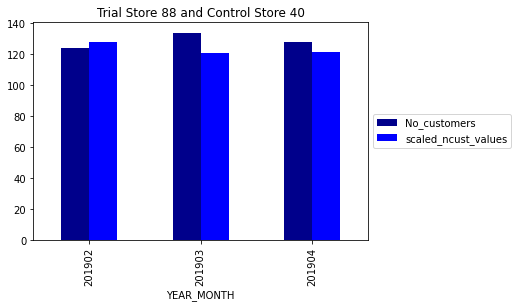

In [51]:
# Ratio of Store 77 and its Control store 233.
ncust_ratio77 = pretrial_full_observ[pretrial_full_observ['STORE_NBR']== 77]['No_customers'].sum()/pretrial_full_observ[pretrial_full_observ['STORE_NBR']==233]['No_customers'].sum()
# Ratio of Store 86 and its Control store 155.
ncust_ratio86 = pretrial_full_observ[pretrial_full_observ['STORE_NBR']== 86]['No_customers'].sum()/pretrial_full_observ[pretrial_full_observ['STORE_NBR']==155]['No_customers'].sum()
# Ratio of Store 88 and its Control store 40.
ncust_ratio88 = pretrial_full_observ[pretrial_full_observ['STORE_NBR']==88]['No_customers'].sum()/pretrial_full_observ[pretrial_full_observ['STORE_NBR']==40]['No_customers'].sum()

trial_full_observ = full_observ_df[(full_observ_df['YEAR_MONTH']>= 201902) & (full_observ_df['YEAR_MONTH']<= 201904)]
scaled_ncust_control = full_observ_df[full_observ_df['STORE_NBR'].isin([233,155,40])][['STORE_NBR','YEAR_MONTH','No_customers']]

def scale_ncust(store):
    if store['STORE_NBR'] == 233:
        return store['No_customers']*ncust_ratio77
    elif store['STORE_NBR'] == 155:
        return store['No_customers']*ncust_ratio86
    elif store['STORE_NBR'] == 40:
        return store['No_customers']*ncust_ratio88
    return

scaled_ncust_control['scaled_ncust_values'] = scaled_ncust_control.apply(lambda store: scale_ncust(store), axis =1)
# During trial period
trial_scaled_ncust_control = scaled_ncust_control[(scaled_ncust_control['YEAR_MONTH']>=201902) & (scaled_ncust_control['YEAR_MONTH']<=201904)]
# During pre trial
pretrial_scaled_ncust_control = scaled_ncust_control[(scaled_ncust_control['YEAR_MONTH']<201902)]

# To store the percentage difference in sales between the trial and scaled control stores for each trial store,
percentage_dict_ncust = {}

combo_dict = {77:233,86:155,88:40}

for trial,control in combo_dict.items():
    # To get scaled sales for the control store corresponding to the current trial store during the trial period.
    control_ncust_data = trial_scaled_ncust_control[trial_scaled_ncust_control['STORE_NBR'] == control]
    # To get sales for the current trial store during the trial period.
    trial_ncust_data = trial_full_observ[trial_full_observ['STORE_NBR'] == trial][["STORE_NBR", "YEAR_MONTH", "No_customers"]]
    # percentage diff = total sales of trial store / total scaled sales of control store
    percentage_dict_ncust[trial] = trial_ncust_data['No_customers'].sum() / control_ncust_data['scaled_ncust_values'].sum()
    print(f"Trial Store: {trial}")
    print(control_ncust_data)
    print(f"Control Store: {control}")
    print(trial_ncust_data)
    trial_ncust_data[["YEAR_MONTH", "No_customers"]].merge(control_ncust_data[["YEAR_MONTH", "scaled_ncust_values"]],on="YEAR_MONTH").set_index("YEAR_MONTH").plot(kind='bar', figsize=(6,4), color=["darkblue", "blue"])
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))
    plt.show()


In [46]:
percentage_dict_ncust

{77: 1.2306529009742622, 86: 1.1354166666666667, 88: 1.0444876946258161}

Significance of Trial minus Control stores nCustomers Percentage Difference Pre-Trial vs Trial.
- Pre-Trial vs. Trial Period for Control Stores: We need control store sales difference in trial and pre trial periods, T-test is applied to compare scaled sales of the control stores for these periods.
- Pre-Trial Similarity Between Trial and Control Stores: T-test compares the actual sales of trial stores with the scaled sales of control stores.
- Trial vs. Pre-Trial Percentage Difference:

In [47]:
# Step 1

alpha = 0.05
store_ids = [40, 155, 233]

for num in store_ids:
    pre_n_cust_data = pretrial_scaled_ncust_control[pretrial_scaled_ncust_control["STORE_NBR"] == num]["scaled_ncust_values"]
    trial_ncust_data = trial_scaled_ncust_control[trial_scaled_ncust_control["STORE_NBR"] == num]["scaled_ncust_values"]
    
    # Perform t-test
    t_stat, p_value = ttest_ind(pre_n_cust_data, trial_ncust_data, equal_var=False)
    
    print(f"Store {num}:")
    print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
    
    # Check significance
    if p_value < alpha:
        print(f"Result: Significant difference (p < {alpha})\n")
    else:
        print(f"Result: No significant difference (p >= {alpha})\n" )


Store 40:
t-statistic = 0.6447, p-value = 0.5377
Result: No significant difference (p >= 0.05)

Store 155:
t-statistic = 1.3889, p-value = 0.2043
Result: No significant difference (p >= 0.05)

Store 233:
t-statistic = 0.8443, p-value = 0.4559
Result: No significant difference (p >= 0.05)



In [48]:
# Step 2

alpha = 0.05

# Iterate through trial-control pairs
for trial, control in combo_dict.items():
    # Extract pre-trial data
    trial_ncust = pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial]["No_customers"]
    control_ncust = pretrial_scaled_ncust_control[pretrial_scaled_ncust_control["STORE_NBR"] == control]["scaled_ncust_values"]
    
    # Perform t-test
    t_stat1, p_value1 = ttest_ind(trial_ncust, control_ncust, equal_var=True)
    
    # Print results
    print(f"Trial store: {trial}, Control store: {control}")
    print(f"t-statistic = {t_stat1:.4f}, p-value = {p_value1:.4f}")
    
    # Check similarity
    if p_value1 >= alpha:
        print("Result: Statistically similar (p >= alpha)\n")
    else:
        print("Result: Statistically different (p < alpha)\n")


Trial store: 77, Control store: 233
t-statistic = 0.0000, p-value = 1.0000
Result: Statistically similar (p >= alpha)

Trial store: 86, Control store: 155
t-statistic = 0.0000, p-value = 1.0000
Result: Statistically similar (p >= alpha)

Trial store: 88, Control store: 40
t-statistic = -0.0000, p-value = 1.0000
Result: Statistically similar (p >= alpha)



In [49]:
# Step 3 
# To merge the details of trial and control stores during pre,trial and post periods

data1_ncust = scaled_ncust_control.sort_values(by=["STORE_NBR", "YEAR_MONTH"], ascending=[False, True]).reset_index().drop(["No_customers", "index"], axis=1)
data2_ncust = full_observ_df[full_observ_df["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEAR_MONTH", "No_customers"]].reset_index().drop(["index", "YEAR_MONTH"], axis=1)
full_data_ncust = pd.concat([data1_ncust,data2_ncust], axis=1)
def mark_ncust(x):
    if x < 201902:
        return "pre trial"
    elif x > 201904:
        return "post trial"
    else:
        return "trial"
full_data_ncust.columns = ['control_stores','YEAR_MONTH','n_cust_control_scaled_values','trial_stores','n_cust_trial_values']
full_data_ncust['period']   = full_data_ncust['YEAR_MONTH'].apply(lambda x: mark_ncust(x))  
full_data_ncust["ncust_Percentage_Diff"] = (full_data_ncust["n_cust_trial_values"] - full_data_ncust["n_cust_control_scaled_values"]) / (((full_data_ncust["n_cust_trial_values"] + full_data_ncust["n_cust_control_scaled_values"])/2))

for trial, control in combo_dict.items():
    print("Trial store:", trial, ", Control store:", cont)
    count_pre_ncust = full_data_ncust[(full_data_ncust["control_stores"] == control) & (full_data_ncust["period"]=="pre trial")]
    std = count_pre_ncust["ncust_Percentage_Diff"].std()
    mean = count_pre_ncust["ncust_Percentage_Diff"].mean()
    #print(std, mean)
    for trial_month in full_data_ncust[full_data_ncust["period"] == "trial"]["YEAR_MONTH"].unique():
        pdif = full_data_ncust[(full_data_ncust["YEAR_MONTH"] == trial_month) & (full_data_ncust["trial_stores"] == trial)]["ncust_Percentage_Diff"]
        print(trial_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(count_pre_ncust)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 40
201902 : -0.19886295797440687
201903 : 8.009609025380932
201904 : 16.114474772873923


Trial store: 86 , Control store: 40
201902 : 6.220524882227514
201903 : 10.52599074274189
201904 : 3.0763575852842706


Trial store: 88 , Control store: 40
201902 : -0.3592881735131531
201903 : 1.2575196020616801
201904 : 0.6092905590514273


Critical t-value for 95% confidence interval:
1.9431802803927816


#### There are statistically significant increases in the number of customers in stores 77 and 86 in at least 2 months during the trial period. However, there is no significant increase in store 88.

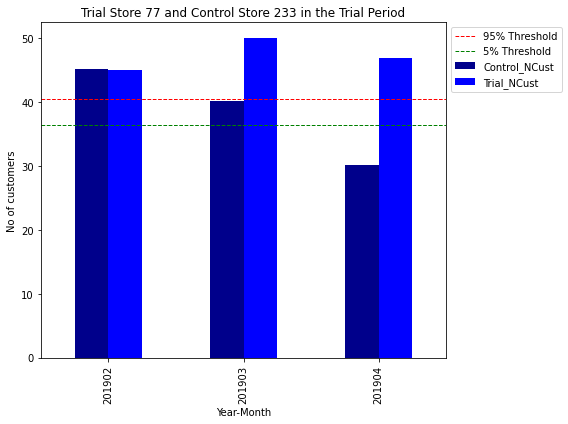

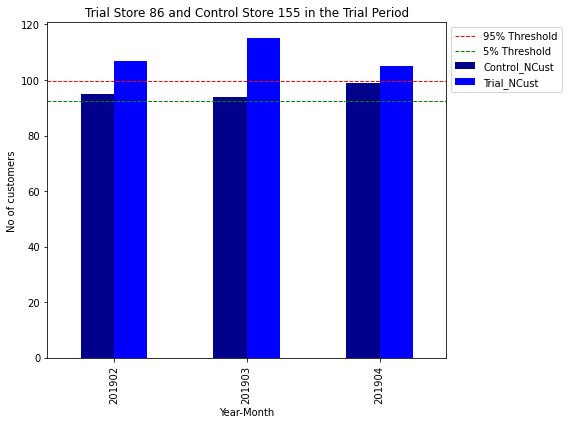

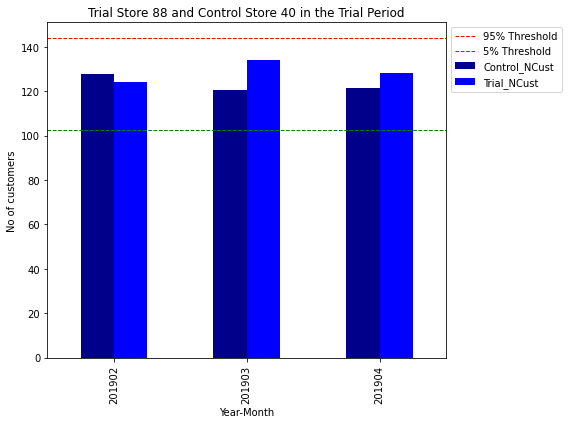

In [53]:
storepair = [[77, 233], [86, 155], [88, 40]]  # Stores are [trial, control]

for stores in storepair: 
    trial, control = stores[0], stores[1]

    # Filter and prepare data for trial and control stores - during trial period
    plot_control_ncust = full_data_ncust[
        (full_data_ncust['control_stores'] == control) & 
        (full_data_ncust.YEAR_MONTH >= 201902) & 
        (full_data_ncust.YEAR_MONTH <= 201904)
    ][['YEAR_MONTH', 'n_cust_control_scaled_values']].rename(columns={"n_cust_control_scaled_values": "Control_NCust"})

    plot_trial_ncust = full_data_ncust[
        (full_data_ncust['trial_stores'] == trial) & 
        (full_data_ncust.YEAR_MONTH >= 201902) & 
        (full_data_ncust.YEAR_MONTH <= 201904)
    ][['YEAR_MONTH', 'n_cust_trial_values']].rename(columns={"n_cust_trial_values": "Trial_NCust"})

    # Merge data for plotting
    toplot_ncust = plot_control_ncust.merge(plot_trial_ncust, on="YEAR_MONTH").set_index("YEAR_MONTH")

    # Plot the bar chart
    ax = toplot_ncust.plot(kind='bar', figsize=(8, 6), color=["darkblue", "blue"])
    
    # Calculate thresholds
    std = full_data_ncust[
        (full_data_ncust['control_stores'] == control) & 
        (full_data_ncust.YEAR_MONTH < 201902)
    ]['ncust_Percentage_Diff'].std()

    mean_control_ncust = plot_control_ncust['Control_NCust'].mean()
    thresh95 = mean_control_ncust * (1 + std * 2)
    thresh5 = mean_control_ncust * (1 - std * 2)

    # Add threshold lines
    ax.axhline(y=thresh95, color='red', linestyle='--', linewidth=1, label="95% Threshold")
    ax.axhline(y=thresh5, color='green', linestyle='--', linewidth=1, label="5% Threshold")

    # Add plot details
    ax.set_title(f'Trial Store {trial} and Control Store {control} in the Trial Period')
    ax.set_xlabel('Year-Month')
    ax.set_ylabel('No of customers')
    ax.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))
    
    # Show plot
    plt.tight_layout()
    plt.show()


#### Conclusion

- Trial store 77: Control store 233

- Trial store 86: Control store 155

- Trial store 88: Control store 40
    
- The Trial store 77 sales for Feb, March, and April exceeds 95% threshold of control store. Same goes to store 86 sales for all 3 trial months.

- Both trial store 77 and 86 showed significant increase in Total Sales and Number of Customers during trial period. But not for trial store 88. 

- Overall the trial showed positive significant result.